# Project 3, L-1 ,DATASET 1 (CLEANING DATA)

Importing essential libraries and csv file

In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\ktand\Downloads\AB_NYC_2019.csv\AB_NYC_2019.csv'  # Update the path as necessary
df= pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Display basic information about the dataset
df.info()

# Display basic statistics of the dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Handling Missing Data

In [3]:
# Handling missing data

# Filling missing 'name' and 'host_name' with 'Unknown'
data = df.assign(name=df['name'].fillna('Unknown'))
data = df.assign(host_name=df['host_name'].fillna('Unknown'))

# Filling missing 'last_review' with a placeholder 'No Review' and 'reviews_per_month' with 0
data = df.assign(last_review=df['last_review'].fillna('No Review'))
data = df.assign(reviews_per_month=df['reviews_per_month'].fillna(0))

# Verify missing data has been handled
missing_data_info = df.isnull().sum()
print(missing_data_info)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


# Removing Duplicates

In [4]:
# Removing duplicate entries
df.drop_duplicates(inplace=True)

# Verify duplicates have been removed
df.duplicated().sum()


0

# Outlier Detection

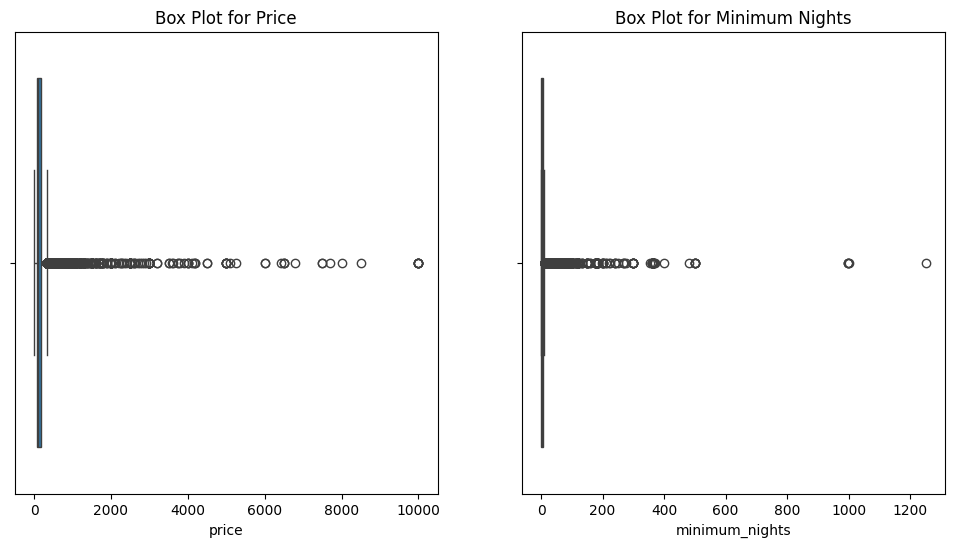

count    48895.000000
mean       143.956233
std        121.935067
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64
count    48895.000000
mean         6.116760
std          9.244957
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         45.000000
Name: minimum_nights, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Box Plot for Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot for Minimum Nights')

plt.show()

# Handling outliers: Capping extreme values in 'price' and 'minimum_nights'
# Cap 'price' at 99th percentile
price_cap = df['price'].quantile(0.99)
df['price'] = df['price'].apply(lambda x: price_cap if x > price_cap else x)

# Cap 'minimum_nights' at 99th percentile
min_nights_cap = df['minimum_nights'].quantile(0.99)
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: min_nights_cap if x > min_nights_cap else x)

# Verify outliers handling
print(df['price'].describe())
print(df['minimum_nights'].describe())